In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [38]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


In [39]:
## Read the data into the notebook
df =  pd.read_csv(r"C:\Users\lavan\OneDrive\Desktop\Great learning\Statistical Methods for Decision MakingSMDM\Week 2\Data set\austo_automobile+(2)+(1).csv")

In [40]:
#To get top 5  records
df.head( )


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [41]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


Q.1.What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [42]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1581 
no. of columns:  14


In [43]:
#Retreive the list of fields along with their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [44]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [45]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [46]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [47]:
# Check unique values of categorical variables
print("Unique values of categorical variables:")
categorical_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
for var in categorical_vars:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")

Unique values of categorical variables:
Gender: ['Male' 'Femal' 'Female' nan 'Femle']
Profession: ['Business' 'Salaried']
Marital_status: ['Married' 'Single']
Education: ['Post Graduate' 'Graduate']
Personal_loan: ['No' 'Yes']
House_loan: ['No' 'Yes']
Partner_working: ['Yes' 'No']
Make: ['SUV' 'Sedan' 'Hatchback']


In [49]:
# Correct inconsistencies in 'Gender' column
df['Gender'] = df['Gender'].replace(['Femal', 'Femle'], 'Female')

In [50]:
unique_values = df['Gender'].unique()
print("Unique values for Gender after correction:\n", unique_values)

Unique values for Gender after correction:
 ['Male' 'Female' nan]


In [51]:
gender_mode = df['Gender'].mode()
print("Mode of Gender:", gender_mode)

Mode of Gender: 0    Male
Name: Gender, dtype: object


In [52]:
# Impute missing values with mode for 'Gender'
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [53]:
# Impute missing values for 'Partner_salary'
df['Partner_salary']=df['Total_salary']-df['Salary']



In [17]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


In [55]:
# Select the columns for outlier detection
columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']

# Loop through each column
for column in columns:
    # Calculate the quartiles (Q1 and Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count the number of outliers
    num_outliers = outliers.shape[0]
    
    # Print the number of outliers for the current column
    print("Number of outliers in", column + ":", num_outliers)


Number of outliers in Age: 0
Number of outliers in No_of_Dependents: 20
Number of outliers in Salary: 0
Number of outliers in Partner_salary: 0
Number of outliers in Total_salary: 27
Number of outliers in Price: 0


<Axes: xlabel='No_of_Dependents'>

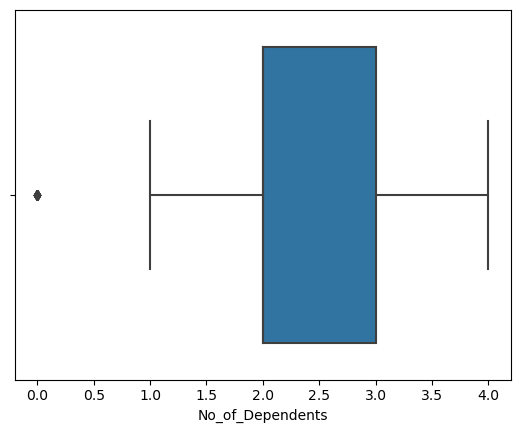

In [20]:
sns.boxplot(x='No_of_Dependents', data=df) 

<Axes: xlabel='Total_salary'>

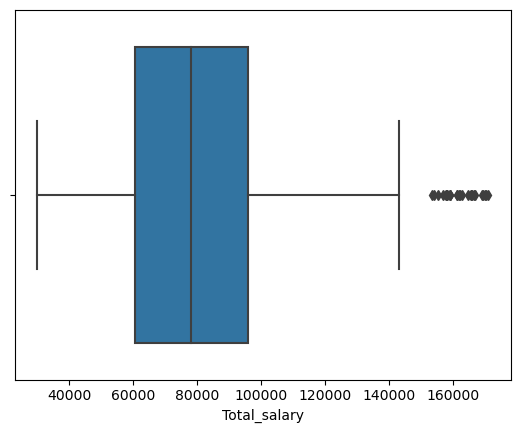

In [21]:
sns.boxplot(x='Total_salary', data=df) 

Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

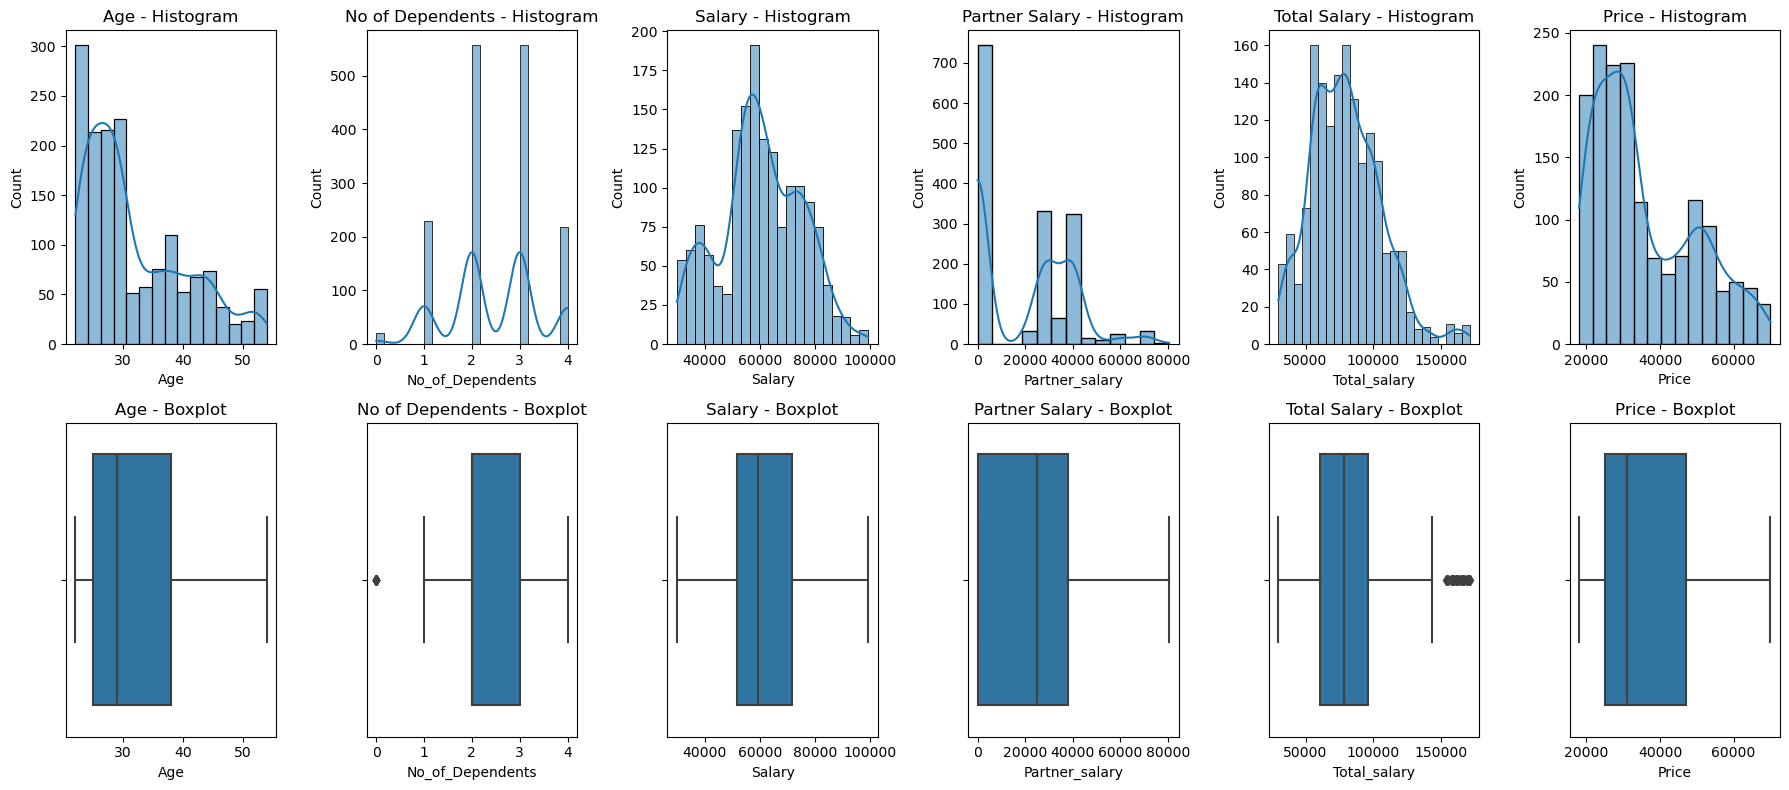

In [56]:
fig, axes = plt.subplots(2, 6, figsize=(18, 8))

# Histograms
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
sns.histplot(df['No_of_Dependents'], kde=True, ax=axes[0, 1])
sns.histplot(df['Salary'], kde=True, ax=axes[0, 2])
sns.histplot(df['Partner_salary'], kde=True, ax=axes[0, 3])
sns.histplot(df['Total_salary'], kde=True, ax=axes[0, 4])
sns.histplot(df['Price'], kde=True, ax=axes[0, 5])

# Boxplots
sns.boxplot(x='Age', data=df, ax=axes[1, 0])
sns.boxplot(x='No_of_Dependents', data=df, ax=axes[1, 1])
sns.boxplot(x='Salary', data=df, ax=axes[1, 2])
sns.boxplot(x='Partner_salary', data=df, ax=axes[1, 3])
sns.boxplot(x='Total_salary', data=df, ax=axes[1, 4])
sns.boxplot(x='Price', data=df, ax=axes[1, 5])

# Set titles for histograms
axes[0, 0].set_title('Age - Histogram')
axes[0, 1].set_title('No of Dependents - Histogram')
axes[0, 2].set_title('Salary - Histogram')
axes[0, 3].set_title('Partner Salary - Histogram')
axes[0, 4].set_title('Total Salary - Histogram')
axes[0, 5].set_title('Price - Histogram')

# Set titles for boxplots
axes[1, 0].set_title('Age - Boxplot')
axes[1, 1].set_title('No of Dependents - Boxplot')
axes[1, 2].set_title('Salary - Boxplot')
axes[1, 3].set_title('Partner Salary - Boxplot')
axes[1, 4].set_title('Total Salary - Boxplot')
axes[1, 5].set_title('Price - Boxplot')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
# Select the numerical variables
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calculate statistical measures
statistics = df_num.describe()

# Display the statistical measures
print("Statistical Measures for Numerical Variables:")
print(statistics)

Statistical Measures for Numerical Variables:
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000

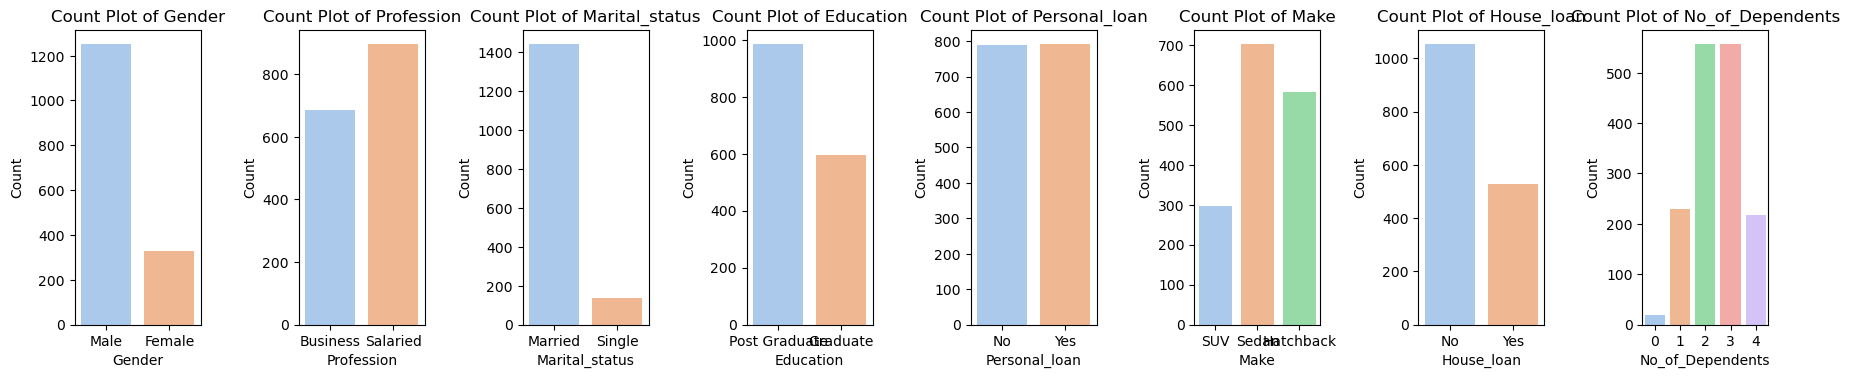

In [24]:
categorical_variables = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'Make', 'House_loan', 'No_of_Dependents']

fig, axes = plt.subplots(1, len(categorical_variables), figsize=(18, 4))

for i, var in enumerate(categorical_variables):
    sns.countplot(x=var, data=df, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout(pad=1.5)
plt.show()

In [25]:
categorical_variables = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'Make', 'House_loan', 'No_of_Dependents']
# Analyze each categorical variable
for var in categorical_variables:
    unique_categories = df[var].unique()
    category_counts = df[var].value_counts()

    print(f"{var}:")
    print("Unique categories:", unique_categories)
    print("Count of each category:")
    for category, count in category_counts.items():
        print(f"- {category}: {count}")
    print()

Gender:
Unique categories: ['Male' 'Female']
Count of each category:
- Male: 1252
- Female: 329

Profession:
Unique categories: ['Business' 'Salaried']
Count of each category:
- Salaried: 896
- Business: 685

Marital_status:
Unique categories: ['Married' 'Single']
Count of each category:
- Married: 1443
- Single: 138

Education:
Unique categories: ['Post Graduate' 'Graduate']
Count of each category:
- Post Graduate: 985
- Graduate: 596

Personal_loan:
Unique categories: ['No' 'Yes']
Count of each category:
- Yes: 792
- No: 789

Make:
Unique categories: ['SUV' 'Sedan' 'Hatchback']
Count of each category:
- Sedan: 702
- Hatchback: 582
- SUV: 297

House_loan:
Unique categories: ['No' 'Yes']
Count of each category:
- No: 1054
- Yes: 527

No_of_Dependents:
Unique categories: [4 3 2 1 0]
Count of each category:
- 3: 557
- 2: 557
- 1: 229
- 4: 218
- 0: 20



D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

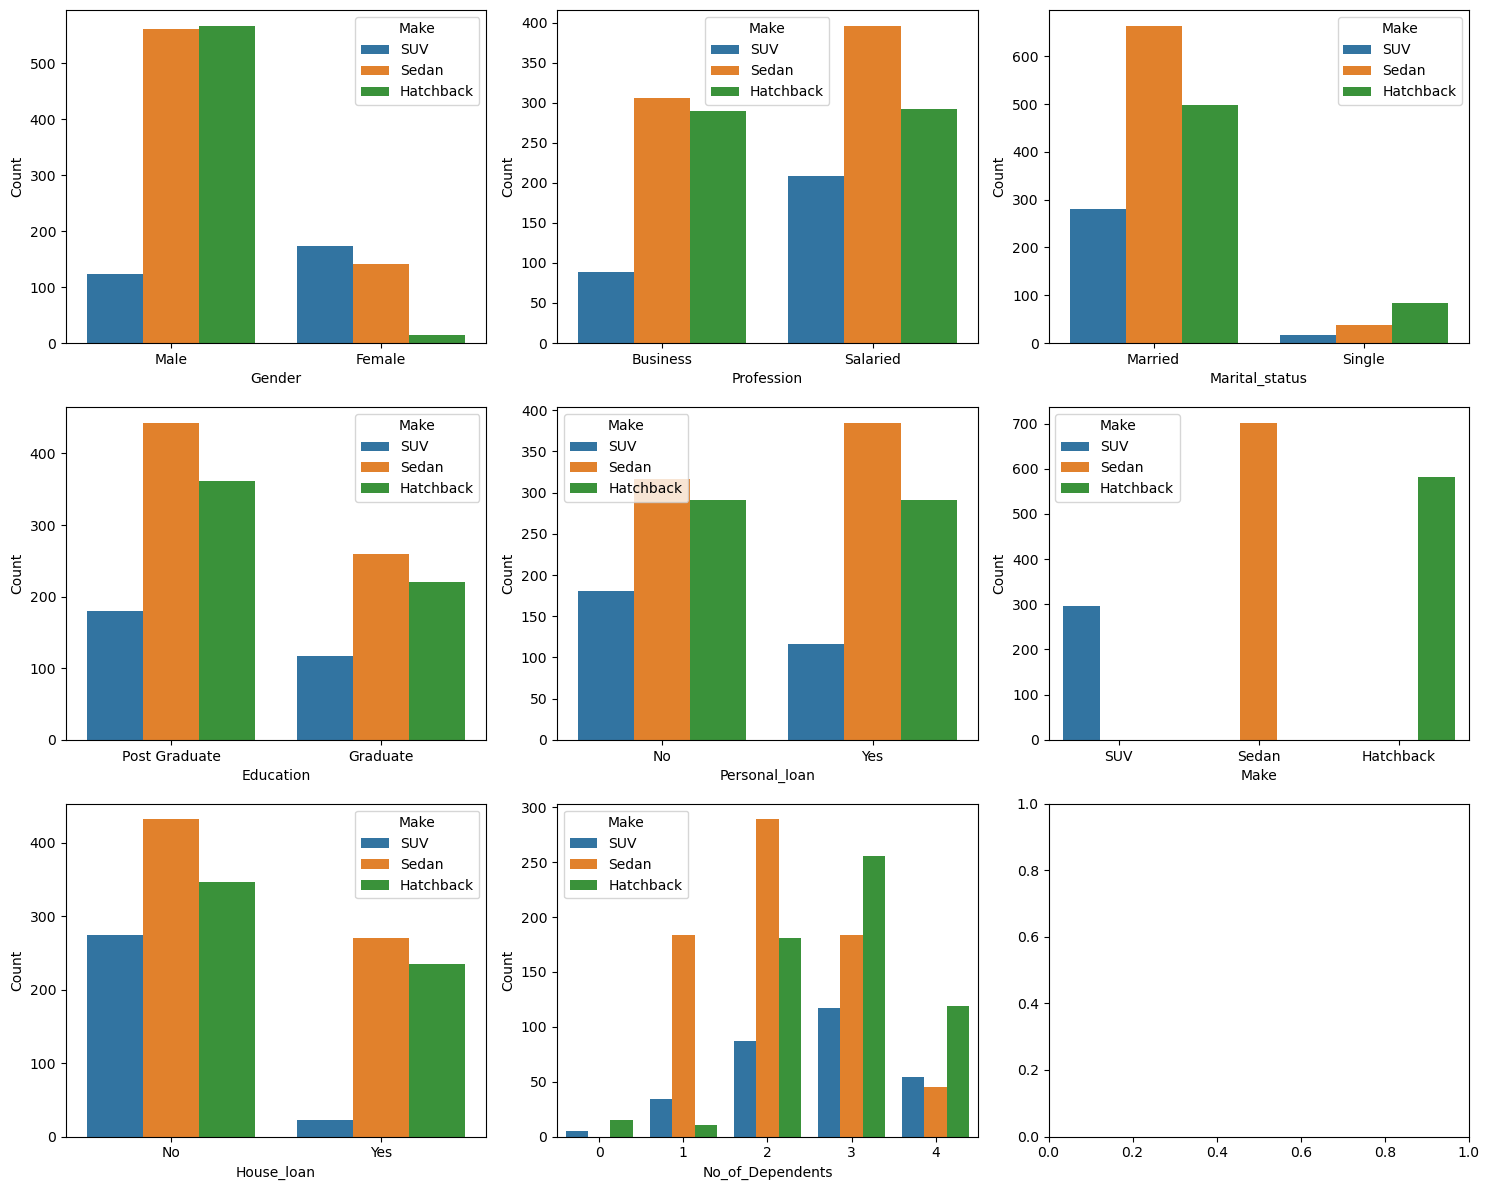

In [26]:
# Define the variables for bivariate analysis
variables = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'Make', 'House_loan', 'No_of_Dependents']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over each variable and create a countplot
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(data=df, x=variable, hue='Make', ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.legend(title='Make')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


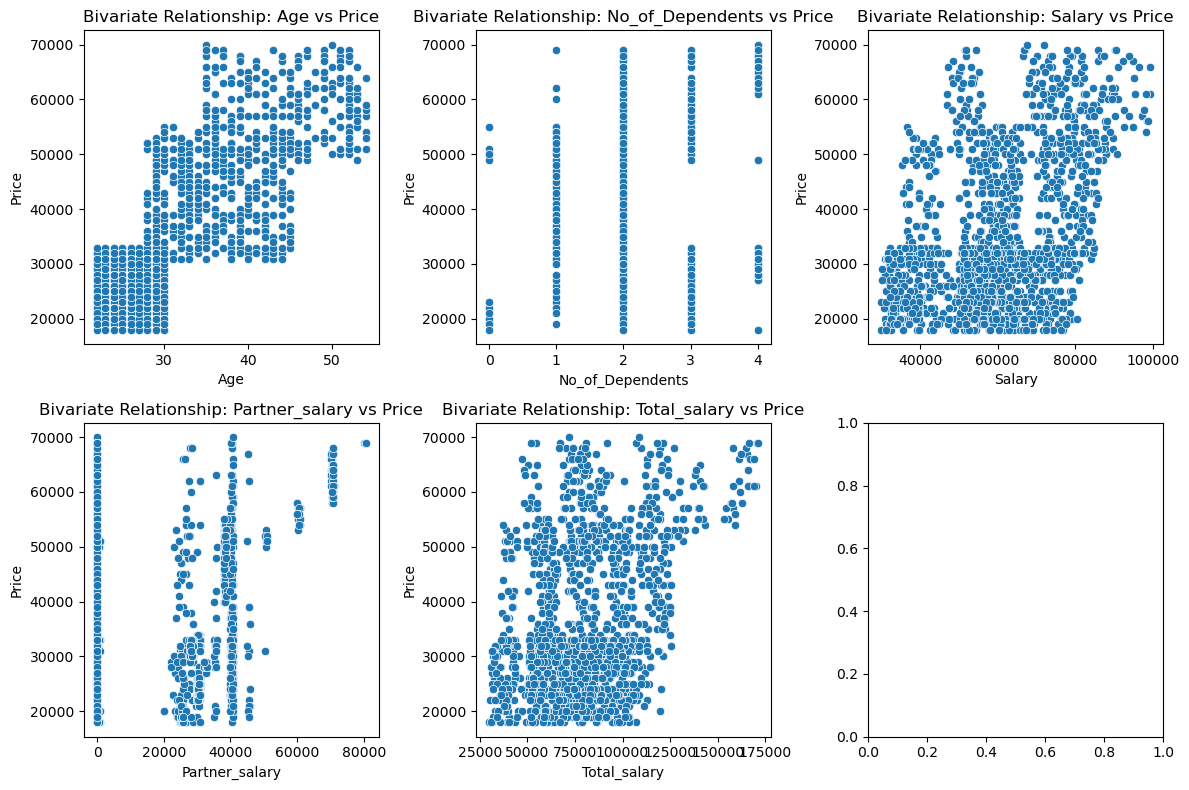

In [27]:

# Select the numerical variables and the 'Price' variable
import matplotlib.pyplot as plt

# Select the numerical variables and the 'Price' variable
numerical_variables = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create subplots for each numerical variable
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over each numerical variable and create a scatter plot
for i, variable in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    sns.scatterplot(x=variable, y='Price', data=df, ax=ax)
    ax.set_title(f'Bivariate Relationship: {variable} vs Price')
    ax.set_xlabel(variable)
    ax.set_ylabel('Price')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


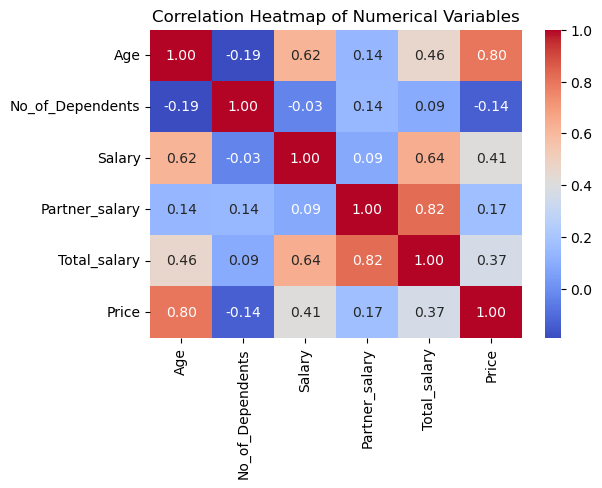

In [28]:
# Generate correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(6, 4))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap of Numerical Variables')

# Display the heatmap
plt.show()

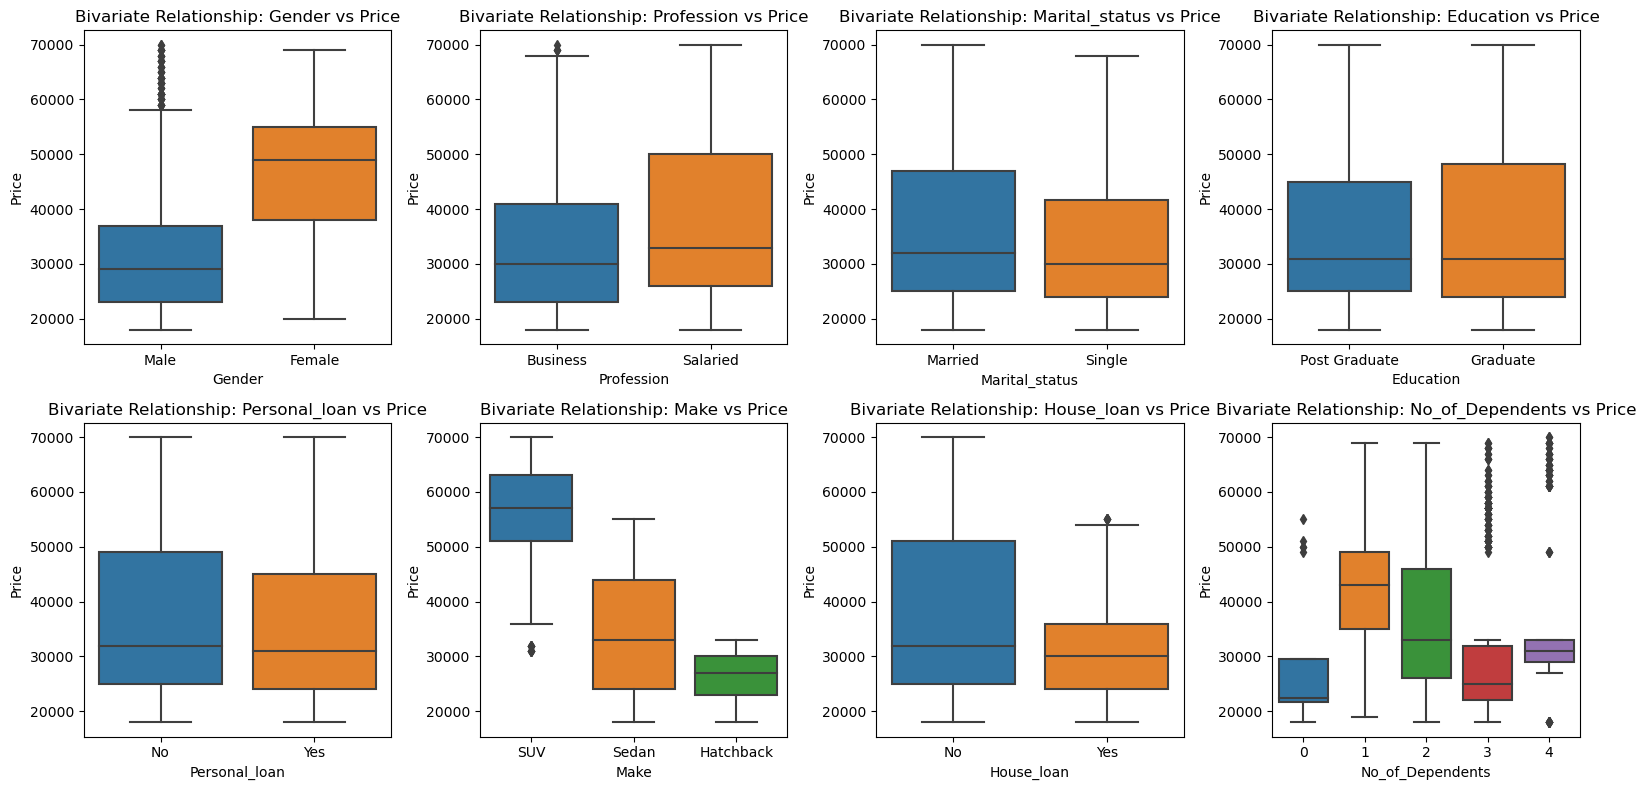

In [29]:
# Select the categorical variables and the 'Price' variable
variables = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'Make', 'House_loan', 'No_of_Dependents']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Iterate over each variable and create a box plot in the corresponding subplot
for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    sns.boxplot(x=variable, y='Price', data=df, ax=ax)
    ax.set_title(f'Bivariate Relationship: {variable} vs Price')
    ax.set_xlabel(variable)
    ax.set_ylabel('Price')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

In [30]:
# Group the DataFrame by car make and gender, and calculate the counts
car_gender_counts = df.groupby(['Make', 'Gender']).size().unstack()

# Calculate the total counts for each gender
gender_totals = car_gender_counts.sum()

# Calculate the percentage distribution for each car make based on gender
car_gender_preference = car_gender_counts.divide(gender_totals, axis=1) * 100

# Print the preferences for car make based on gender as percentages
print(car_gender_preference)

Gender        Female       Male
Make                           
Hatchback   4.559271  45.287540
SUV        52.583587   9.904153
Sedan      42.857143  44.808307


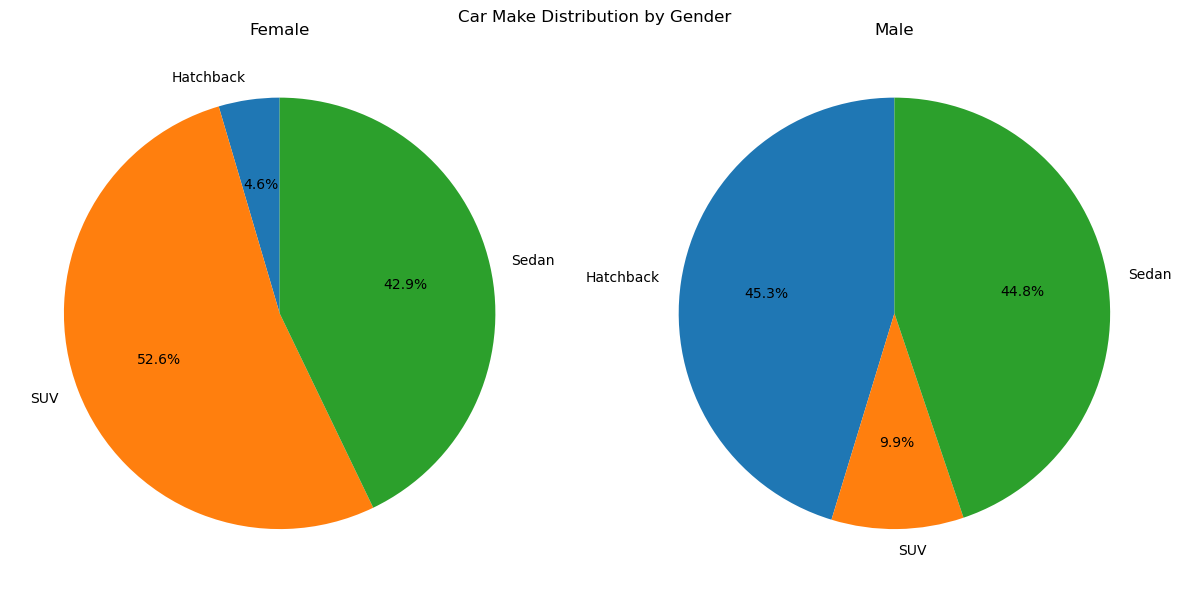

In [31]:
# Group the data by Gender and Make
gender_make_counts = df.groupby(['Gender', 'Make']).size().unstack()

# Create a pie chart for each gender
fig, axes = plt.subplots(nrows=1, ncols=len(gender_make_counts), figsize=(12, 6))

# Iterate over each gender and create a pie chart
for i, (gender, counts) in enumerate(gender_make_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(gender)

# Set the overall title
fig.suptitle('Car Make Distribution by Gender')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie chart
plt.show()




E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

In [32]:
# Group the data by Profession and Make
profession_make_counts = df.groupby(['Profession', 'Make']).size().unstack()

# Calculate the percentage distribution within each profession
profession_make_percentages = profession_make_counts.apply(lambda row: row / row.sum() * 100, axis=1)

# Display the results
print("Bivariate Analysis: Profession vs Make")
print(profession_make_percentages)

Bivariate Analysis: Profession vs Make
Make        Hatchback        SUV      Sedan
Profession                                 
Business    42.335766  12.992701  44.671533
Salaried    32.589286  23.214286  44.196429


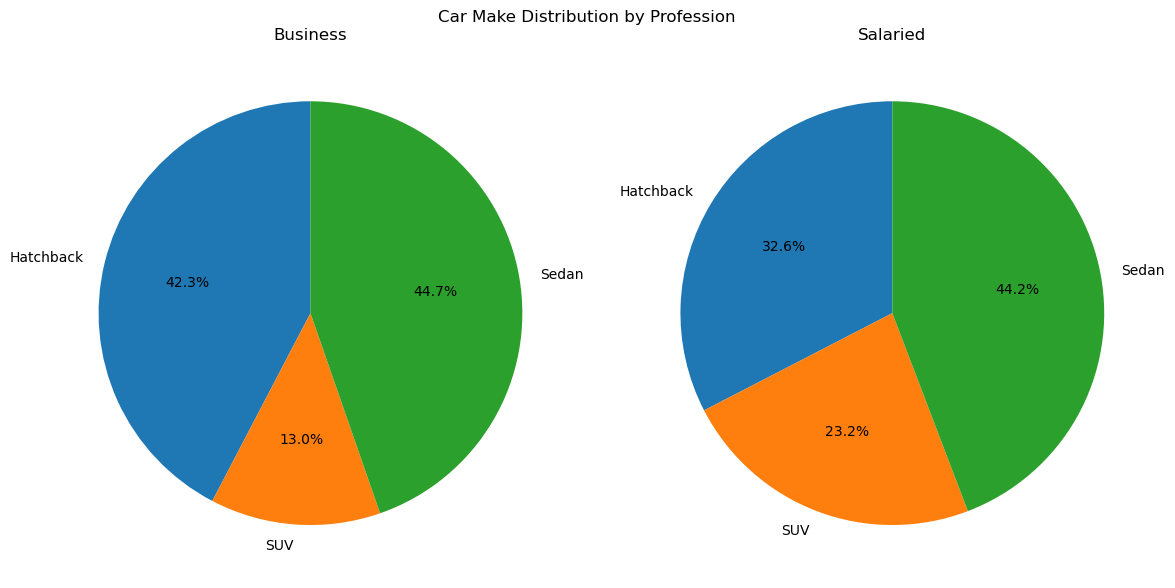

In [33]:
# Group the data by Profession and Make
profession_make_counts = df.groupby(['Profession', 'Make']).size().unstack()

# Create a pie chart for each profession
fig, axes = plt.subplots(nrows=1, ncols=len(profession_make_counts), figsize=(12, 6))

# Iterate over each profession and create a pie chart
for i, (profession, counts) in enumerate(profession_make_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(profession)

# Set the overall title
fig.suptitle('Car Make Distribution by Profession')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie chart
plt.show()



E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [34]:
# Filter the data for males
df_male = df[df['Gender'] == 'Male']

# Group the data by Profession and Make for males
profession_make_counts_male = df_male.groupby(['Profession', 'Make']).size().unstack()

# Get the unique professions for males
professions_male = df_male['Profession'].unique()

# Iterate over each profession for males
for profession in professions_male:
    # Get the counts for the specific profession and gender (male)
    counts_male = profession_make_counts_male.loc[profession]
    
    # Calculate the total count for percentage calculation
    total_count_male = counts_male.sum()
    
    # Calculate the percentage distribution for males
    percentage_male = counts_male / total_count_male * 100
    
    # Print the percentage distribution for males
    print(f'Percentage Distribution of Car Makes for {profession} (Male):')
    print(percentage_male)
    print()

Percentage Distribution of Car Makes for Business (Male):
Make
Hatchback    50.000000
SUV           5.862069
Sedan        44.137931
Name: Business, dtype: float64

Percentage Distribution of Car Makes for Salaried (Male):
Make
Hatchback    41.220238
SUV          13.392857
Sedan        45.386905
Name: Salaried, dtype: float64



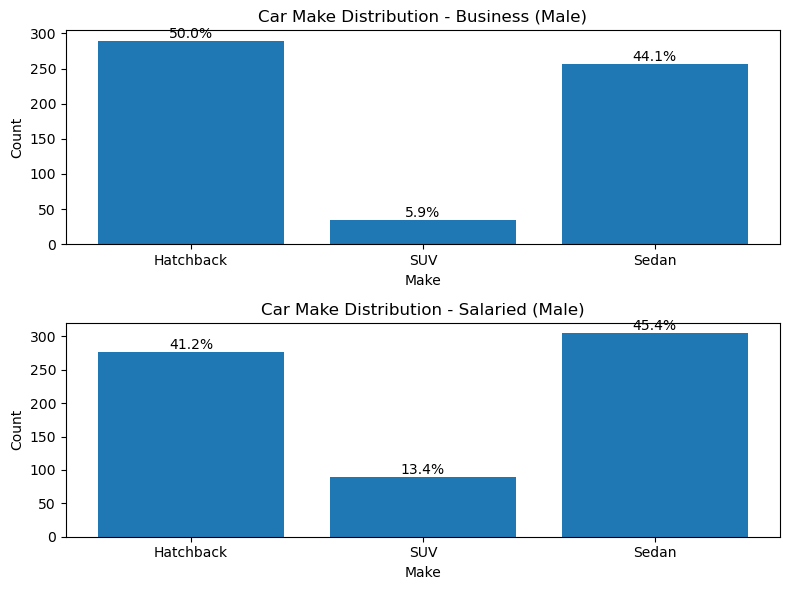

In [35]:
 # Filter the data for males
df_male = df[df['Gender'] == 'Male']

# Group the data by Profession and Make for males
profession_make_counts_male = df_male.groupby(['Profession', 'Make']).size().unstack()

# Get the unique professions for males
professions_male = df_male['Profession'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(professions_male), ncols=1, figsize=(8, 6))

# Iterate over each profession for males
for i, profession in enumerate(professions_male):
    # Get the counts for the specific profession and gender (male)
    counts_male = profession_make_counts_male.loc[profession]
    
    # Calculate the total count for percentage calculation
    total_count_male = counts_male.sum()
    
    # Create a bar chart for males
    x_male = range(len(counts_male))
    axes[i].bar(x_male, counts_male)
    
    # Add percentage labels above each bar for males
    for j, count_male in enumerate(counts_male):
        percentage_male = count_male / total_count_male * 100
        axes[i].text(j, count_male, f'{percentage_male:.1f}%', ha='center', va='bottom')
    
    # Set the labels and title for males
    axes[i].set_xticks(x_male)
    axes[i].set_xticklabels(counts_male.index)
    axes[i].set_xlabel('Make')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Car Make Distribution - {profession} (Male)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

In [36]:
# Filter the DataFrame based on Gender and select the Price column
filtered_df = df[df['Gender'].isin(['Male', 'Female'])]

# Create a cross-tabulation table
cross_tab = pd.crosstab(index=filtered_df['Gender'], columns='Amount Spent', values=filtered_df['Price'], aggfunc='sum')

# Print the cross-tabulation table
print("Cross-tabulation: Amount Spent on Purchasing Automobiles by Gender")
print(cross_tab)

Cross-tabulation: Amount Spent on Purchasing Automobiles by Gender
col_0   Amount Spent
Gender              
Female      15695000
Male        40585000


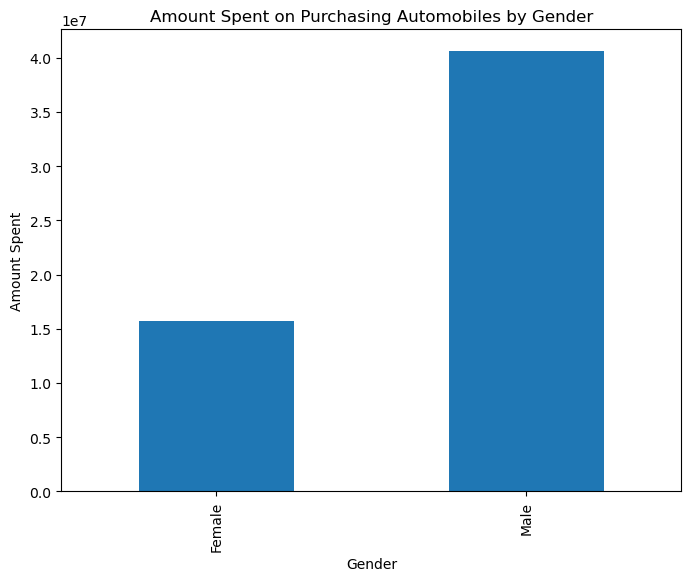

In [61]:
# Filter the DataFrame based on Gender and select the Price column
filtered_df = df[df['Gender'].isin(['Male', 'Female'])]

# Create a cross-tabulation table
cross_tab = pd.crosstab(index=filtered_df['Gender'], columns='Amount Spent', values=filtered_df['Price'], aggfunc='sum')

# Plot the cross-tabulation table
cross_tab.plot(kind='bar', legend=False, figsize=(8, 6))

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Amount Spent')
plt.title('Amount Spent on Purchasing Automobiles by Gender')

# Show the plot
plt.show()


In [58]:
# Filter the DataFrame based on Personal Loan and select the Price column
filtered_df = df[df['Personal_loan'].isin(['Yes', 'No'])]

# Create a cross-tabulation table
cross_tab = pd.crosstab(index=filtered_df['Personal_loan'], columns='Amount Spent', values=filtered_df['Price'], aggfunc='sum')

# Print the cross-tabulation table
print("Cross-tabulation: Amount Spent on Purchasing Automobiles by Personal Loan")
print(cross_tab)

Cross-tabulation: Amount Spent on Purchasing Automobiles by Personal Loan
col_0          Amount Spent
Personal_loan              
No                 28990000
Yes                27290000


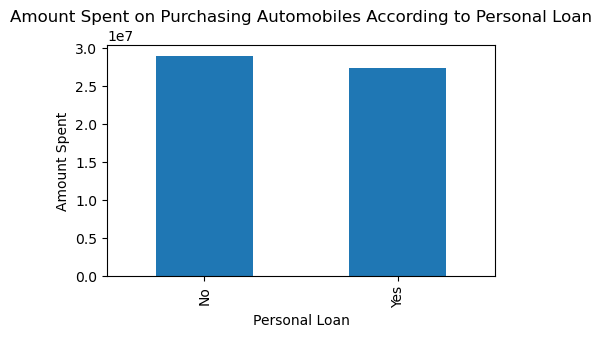

In [59]:
# Filter the DataFrame based on Personal Loan and select the Price column
filtered_df = df[df['Personal_loan'].isin(['Yes', 'No'])]

# Calculate the total amount spent on purchasing automobiles
amount_spent = filtered_df.groupby('Personal_loan')['Price'].sum()

# Create a bar plot
amount_spent.plot(kind='bar', figsize=(5, 3))

# Set the labels and title
plt.xlabel('Personal Loan')
plt.ylabel('Amount Spent')
plt.title('Amount Spent on Purchasing Automobiles According to Personal Loan')

# Show the plot
plt.show()

G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [62]:
# Find the car make with the maximum price
max_price_make = df[df['Price'] == df.groupby('Make')['Price'].transform('max')]['Make'].values[0]

# Print the car make with the maximum price
print("Car make with the maximum price:", max_price_make)

Car make with the maximum price: SUV


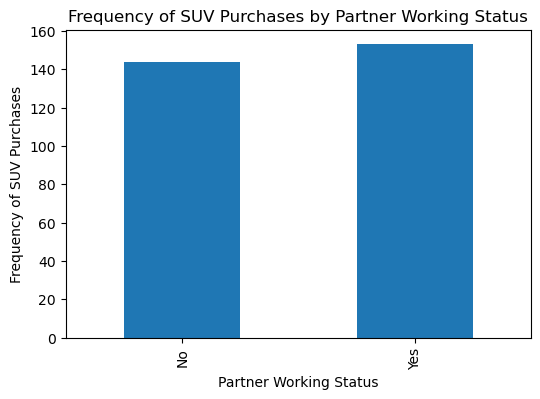

In [63]:
# Filter the data to include only SUV purchases
suv_purchases = df[df['Make'] == 'SUV']

# Group the data by Partner_working and calculate the frequency of SUV purchases within each group
suv_frequency_by_partner = suv_purchases.groupby('Partner_working')['Make'].count()

# Create a bar plot with reduced size
plt.figure(figsize=(6, 4))
suv_frequency_by_partner.plot(kind='bar')

# Set the labels and title
plt.xlabel('Partner Working Status')
plt.ylabel('Frequency of SUV Purchases')
plt.title('Frequency of SUV Purchases by Partner Working Status')

# Show the plot
plt.show()








H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

 

In [64]:
# Calculate purchase history by counting cars in each make category for each gender and marital status
purchase_history = df.groupby(['Gender', 'Marital_status', 'Make'])['Make'].count().unstack().fillna(0)

# Display the purchase history DataFrame
purchase_history

Make                   Hatchback  SUV  Sedan
Gender Marital_status                       
Female Married                14  166    127
       Single                  1    7     14
Male   Married               484  115    537
       Single                 83    9     24

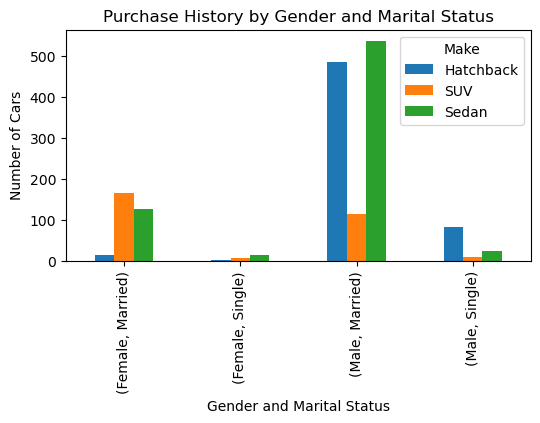

In [65]:
# Create a grouped bar plot from the purchase history DataFrame
purchase_history.plot(kind='bar', figsize=(6, 3))

# Set the labels and title
plt.xlabel('Gender and Marital Status')
plt.ylabel('Number of Cars')
plt.title('Purchase History by Gender and Marital Status')

# Show the plot
plt.show()